In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


In [2]:
# Datenladen 
df = pd.read_csv("data_science_salaries.csv")

In [5]:
# Erste Datenexploration
print(df.head(3))

        job_title experience_level employment_type work_models  work_year  \
0   Data Engineer        Mid-level       Full-time      Remote       2024   
1   Data Engineer        Mid-level       Full-time      Remote       2024   
2  Data Scientist     Senior-level       Full-time      Remote       2024   

  employee_residence  salary salary_currency  salary_in_usd company_location  \
0      United States  148100             USD         148100    United States   
1      United States   98700             USD          98700    United States   
2      United States  140032             USD         140032    United States   

  company_size  
0       Medium  
1       Medium  
2       Medium  


In [6]:
# Daten Qualität
doppelte = df[df.duplicated()]
null =df.isnull().sum()
# Beispiel für Ermittlung von Uniques  
uniques = df['job_title'].nunique()
# Numerische Daten
numerischeDaten = df.describe()

print(len(doppelte))
print(null)
print(uniques)
print(numerischeDaten)

0
job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64
132
         work_year        salary  salary_in_usd
count  6599.000000  6.599000e+03    6599.000000
mean   2022.818457  1.792833e+05  145560.558569
std       0.674809  5.263722e+05   70946.838070
min    2020.000000  1.400000e+04   15000.000000
25%    2023.000000  9.600000e+04   95000.000000
50%    2023.000000  1.400000e+05  138666.000000
75%    2023.000000  1.875000e+05  185000.000000
max    2024.000000  3.040000e+07  750000.000000


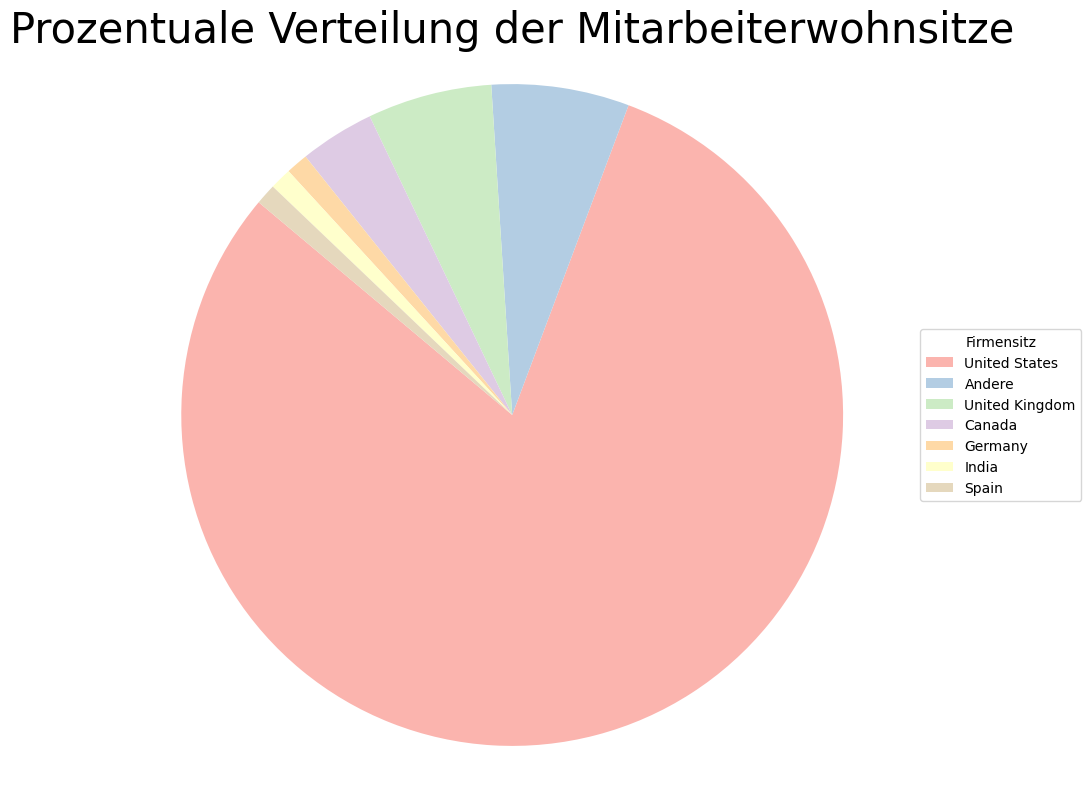

In [7]:

# Berechnung der prozentualen Verteilung der Länder
country_counts = Counter(df['employee_residence'])
total = sum(country_counts.values())
country_percentages = {country: count / total * 100 for country, count in country_counts.items()}

# Gruppierung der Länder mit weniger als 2,5% in eine Kategorie "Andere"
grouped_countries = {'Andere': 0}
for country, percentage in country_percentages.items():
    if percentage < 1:
        grouped_countries['Andere'] += percentage
    else:
        grouped_countries[country] = percentage

# Sortierung der Daten für das Pie Chart
sorted_countries = dict(sorted(grouped_countries.items(), key=lambda item: item[1], reverse=True))

# Erstellung des Pie Charts
plt.figure(figsize=(10, 8))
pie, _ = plt.pie(sorted_countries.values(), startangle=140, colors=sns.color_palette("Pastel1", len(sorted_countries)))
plt.title('Prozentuale Verteilung der Mitarbeiterwohnsitze', fontsize=30)
plt.legend(pie, sorted_countries.keys(), title="Firmensitz", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal') 
plt.tight_layout()
plt.show()

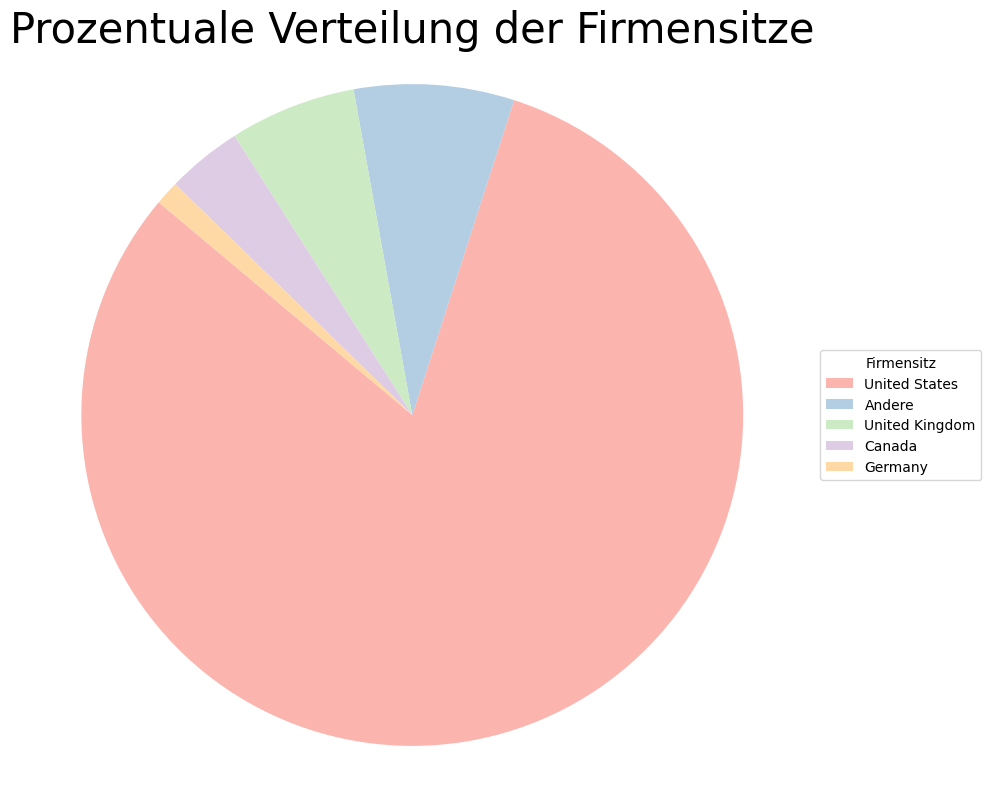

In [8]:

# Berechnung der prozentualen Verteilung der Länder
country_counts = Counter(df['company_location'])
total = sum(country_counts.values())
country_percentages = {country: count / total * 100 for country, count in country_counts.items()}

# Gruppierung der Länder mit weniger als 2,5% in eine Kategorie "Andere"
grouped_countries = {'Andere': 0}
for country, percentage in country_percentages.items():
    if percentage < 1:
        grouped_countries['Andere'] += percentage
    else:
        grouped_countries[country] = percentage

# Sortierung der Daten für das Pie Chart
sorted_countries = dict(sorted(grouped_countries.items(), key=lambda item: item[1], reverse=True))

# Erstellung des Pie Charts 
plt.figure(figsize=(10, 8))
pie, _ = plt.pie(sorted_countries.values(), startangle=140, colors=sns.color_palette("Pastel1", len(sorted_countries)))
plt.title('Prozentuale Verteilung der Firmensitze', fontsize=30)
plt.legend(pie, sorted_countries.keys(), title="Firmensitz", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')  
plt.tight_layout()
plt.show()

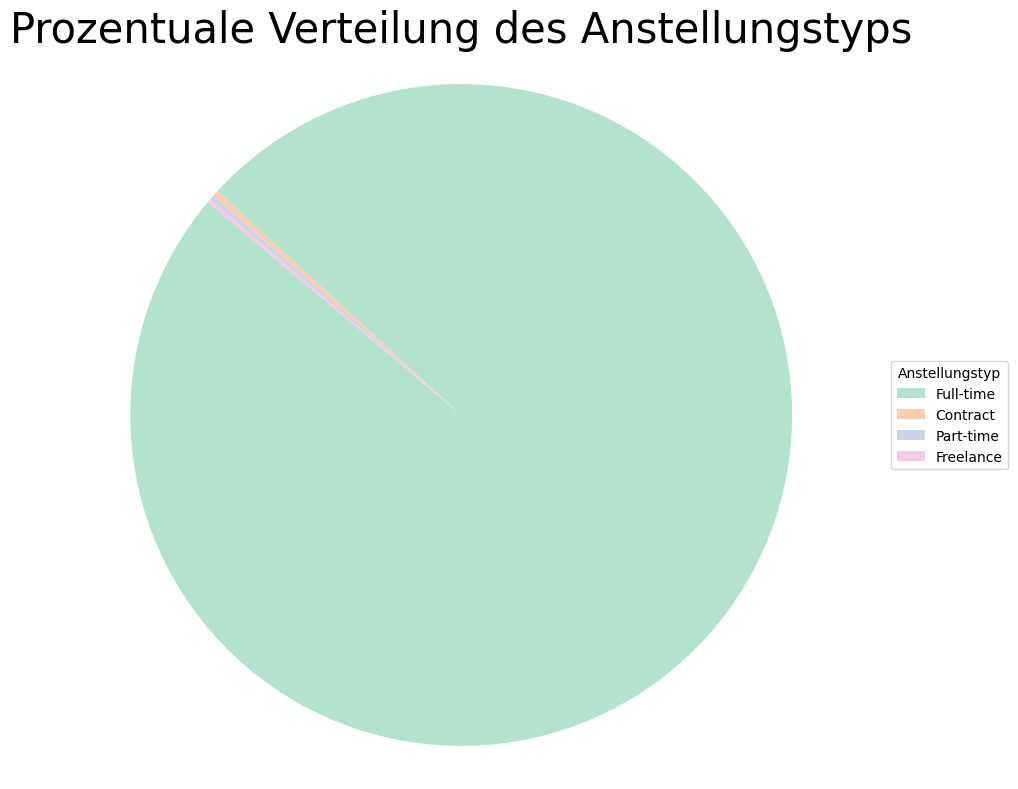

In [9]:
# Berechnung der prozentualen Verteilung der Anstellungstypen
employment_counts = Counter(df['employment_type'])
total_employment = sum(employment_counts.values())
employment_percentages = {type: count / total_employment * 100 for type, count in employment_counts.items()}

# Sortierung der Daten für das Pie Chart
sorted_employment = dict(sorted(employment_percentages.items(), key=lambda item: item[1], reverse=True))

# Erstellung des Pie Charts 
plt.figure(figsize=(10, 8))
pie, _ = plt.pie(sorted_employment.values(), startangle=140, colors=sns.color_palette("Pastel2", len(sorted_employment)))
plt.title('Prozentuale Verteilung des Anstellungstyps', fontsize=30)
plt.legend(pie, sorted_employment.keys(), title="Anstellungstyp", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal') 
plt.tight_layout()
plt.show()

C:\Users\fanta\AppData\Local\Temp\ipykernel_14556\940881201.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='experience_level', order=df['experience_level'].value_counts().index, palette='Set2')


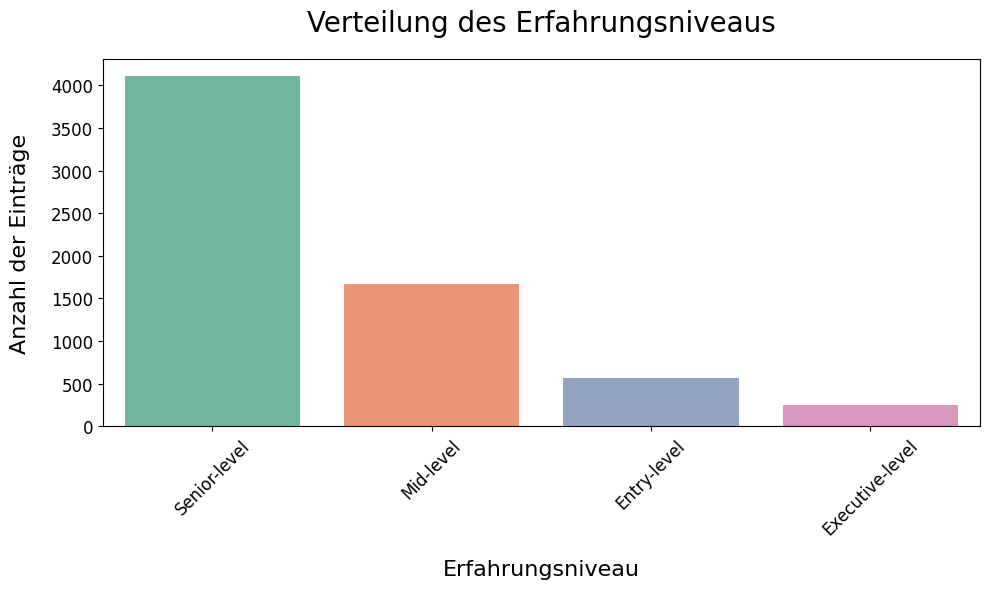

In [10]:
# Diagramm zur Verteilung des Erfahrungsniveaus
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='experience_level', order=df['experience_level'].value_counts().index, palette='Set2')
plt.title('Verteilung des Erfahrungsniveaus', fontsize=20, pad=20)
plt.xlabel('Erfahrungsniveau', fontsize=16, labelpad=15)
plt.ylabel('Anzahl der Einträge', fontsize=16, labelpad=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\fanta\AppData\Local\Temp\ipykernel_14556\3981348834.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='work_models', order=df['work_models'].value_counts().index, palette='Set2')


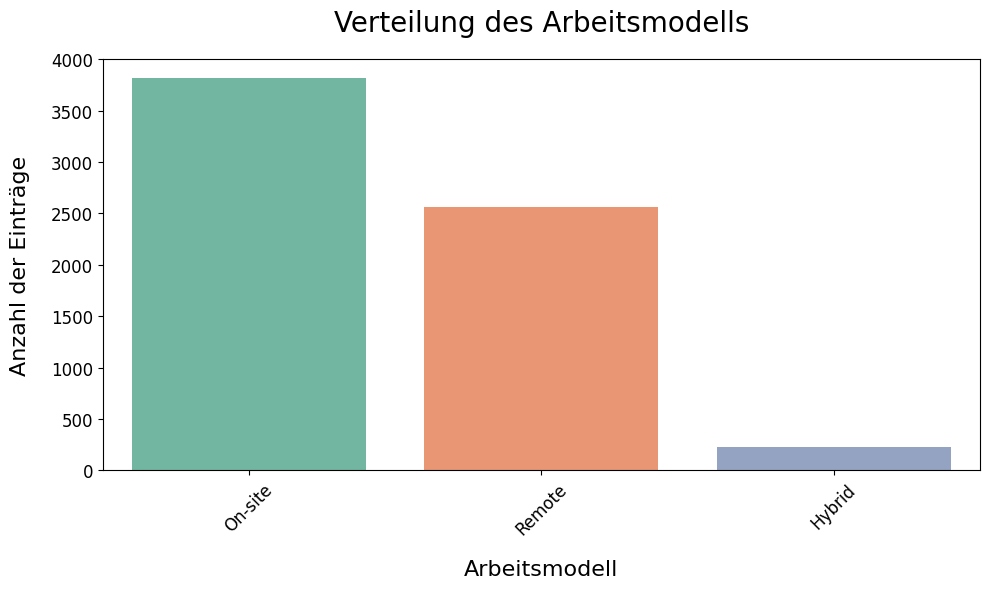

In [11]:
# Diagramm zur Verteilung des Arbeitsmodells
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='work_models', order=df['work_models'].value_counts().index, palette='Set2')
plt.title('Verteilung des Arbeitsmodells', fontsize=20, pad=20)
plt.xlabel('Arbeitsmodell', fontsize=16, labelpad=15)
plt.ylabel('Anzahl der Einträge', fontsize=16, labelpad=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

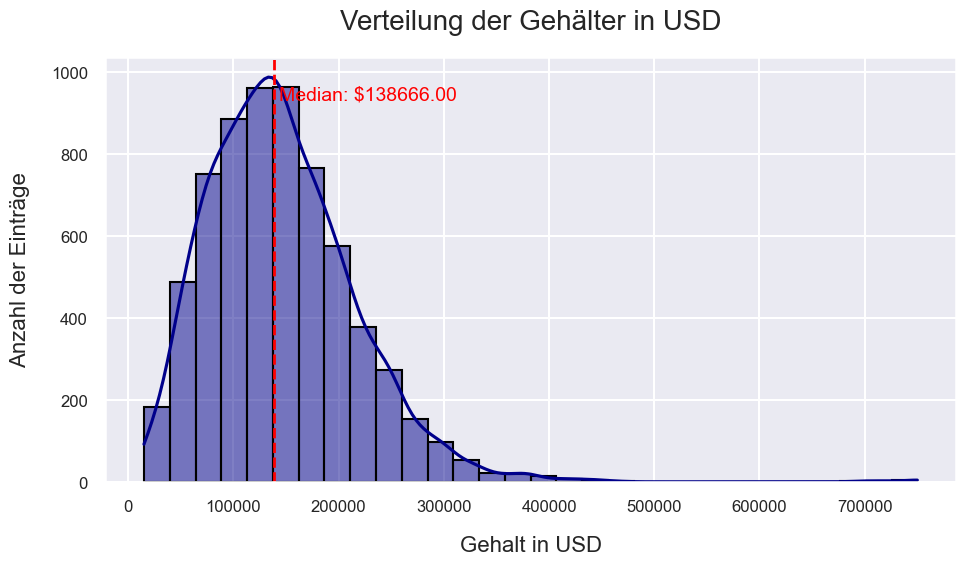

In [12]:
# Verteilung der Gehälter
sns.set_theme(context='talk', style='darkgrid')

plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True, bins=30, color='darkblue', edgecolor='black')
plt.title('Verteilung der Gehälter in USD', fontsize=20, pad=20)
plt.xlabel('Gehalt in USD', fontsize=16, labelpad=15)
plt.ylabel('Anzahl der Einträge', fontsize=16, labelpad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

median_salary = df['salary_in_usd'].median()
plt.axvline(median_salary, color='red', linestyle='--', linewidth=2)
plt.text(median_salary+5000, plt.ylim()[1]*0.9, f'Median: ${median_salary:.2f}', color='red', fontsize=14)

plt.tight_layout()
plt.show()

C:\Users\fanta\AppData\Local\Temp\ipykernel_14556\3491140340.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='employee_residence', y='salary_in_usd', data=filtered_data, palette="Set2")


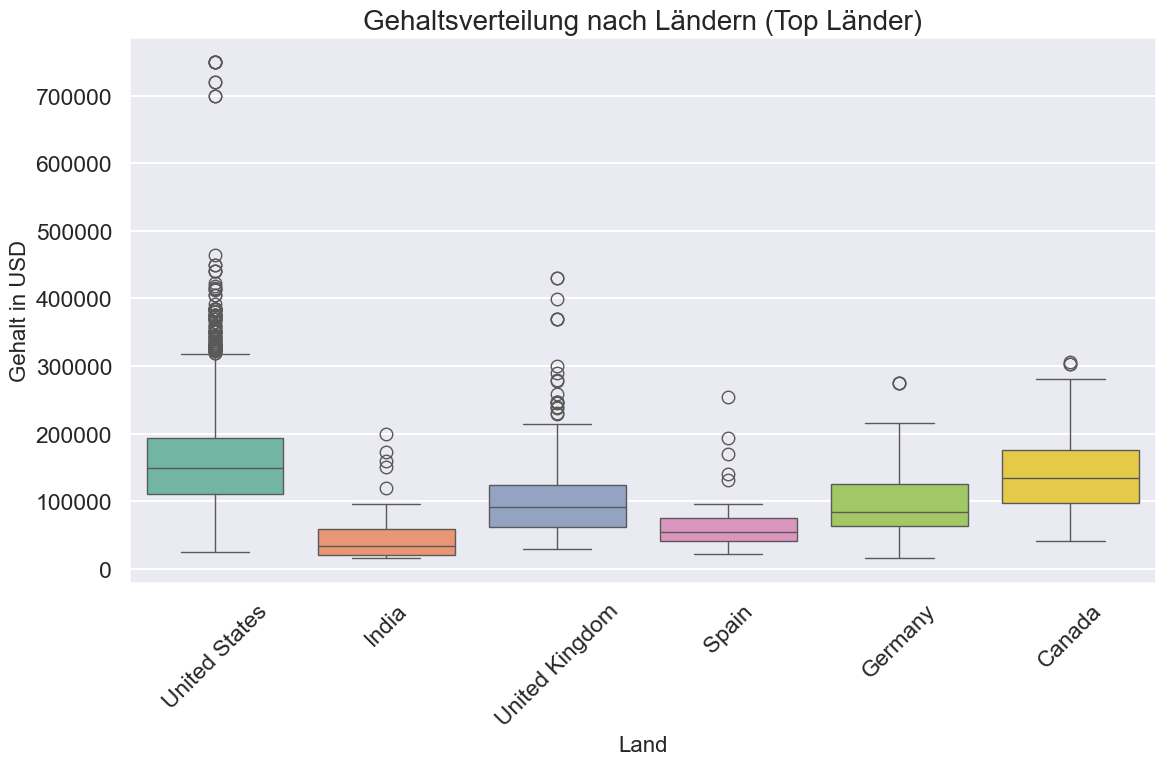

In [13]:
# Berechnung der Anzahl der Datenpunkte pro Land und des prozentualen Anteils
country_counts = df['employee_residence'].value_counts()
country_percentage = country_counts / country_counts.sum()

# Filtern der Länder, die mindestens 5% der Daten ausmachen
relevant_countries = country_percentage[country_percentage >= 0.01].index
filtered_data = df[df['employee_residence'].isin(relevant_countries)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='employee_residence', y='salary_in_usd', data=filtered_data, palette="Set2")
plt.xticks(rotation=45)
plt.title('Gehaltsverteilung nach Ländern (Top Länder)', fontsize=20)
plt.xlabel('Land', fontsize=16)
plt.ylabel('Gehalt in USD', fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\fanta\AppData\Local\Temp\ipykernel_14556\764554800.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], x=category, y='salary_in_usd', data=df,
C:\Users\fanta\AppData\Local\Temp\ipykernel_14556\764554800.py:11: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(ax=axes[i], x=category, y='salary_in_usd', data=df,
C:\Users\fanta\AppData\Local\Temp\ipykernel_14556\764554800.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")
C:\Users\fanta\AppData\Local\Temp\ipykernel_14556\764554800.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be

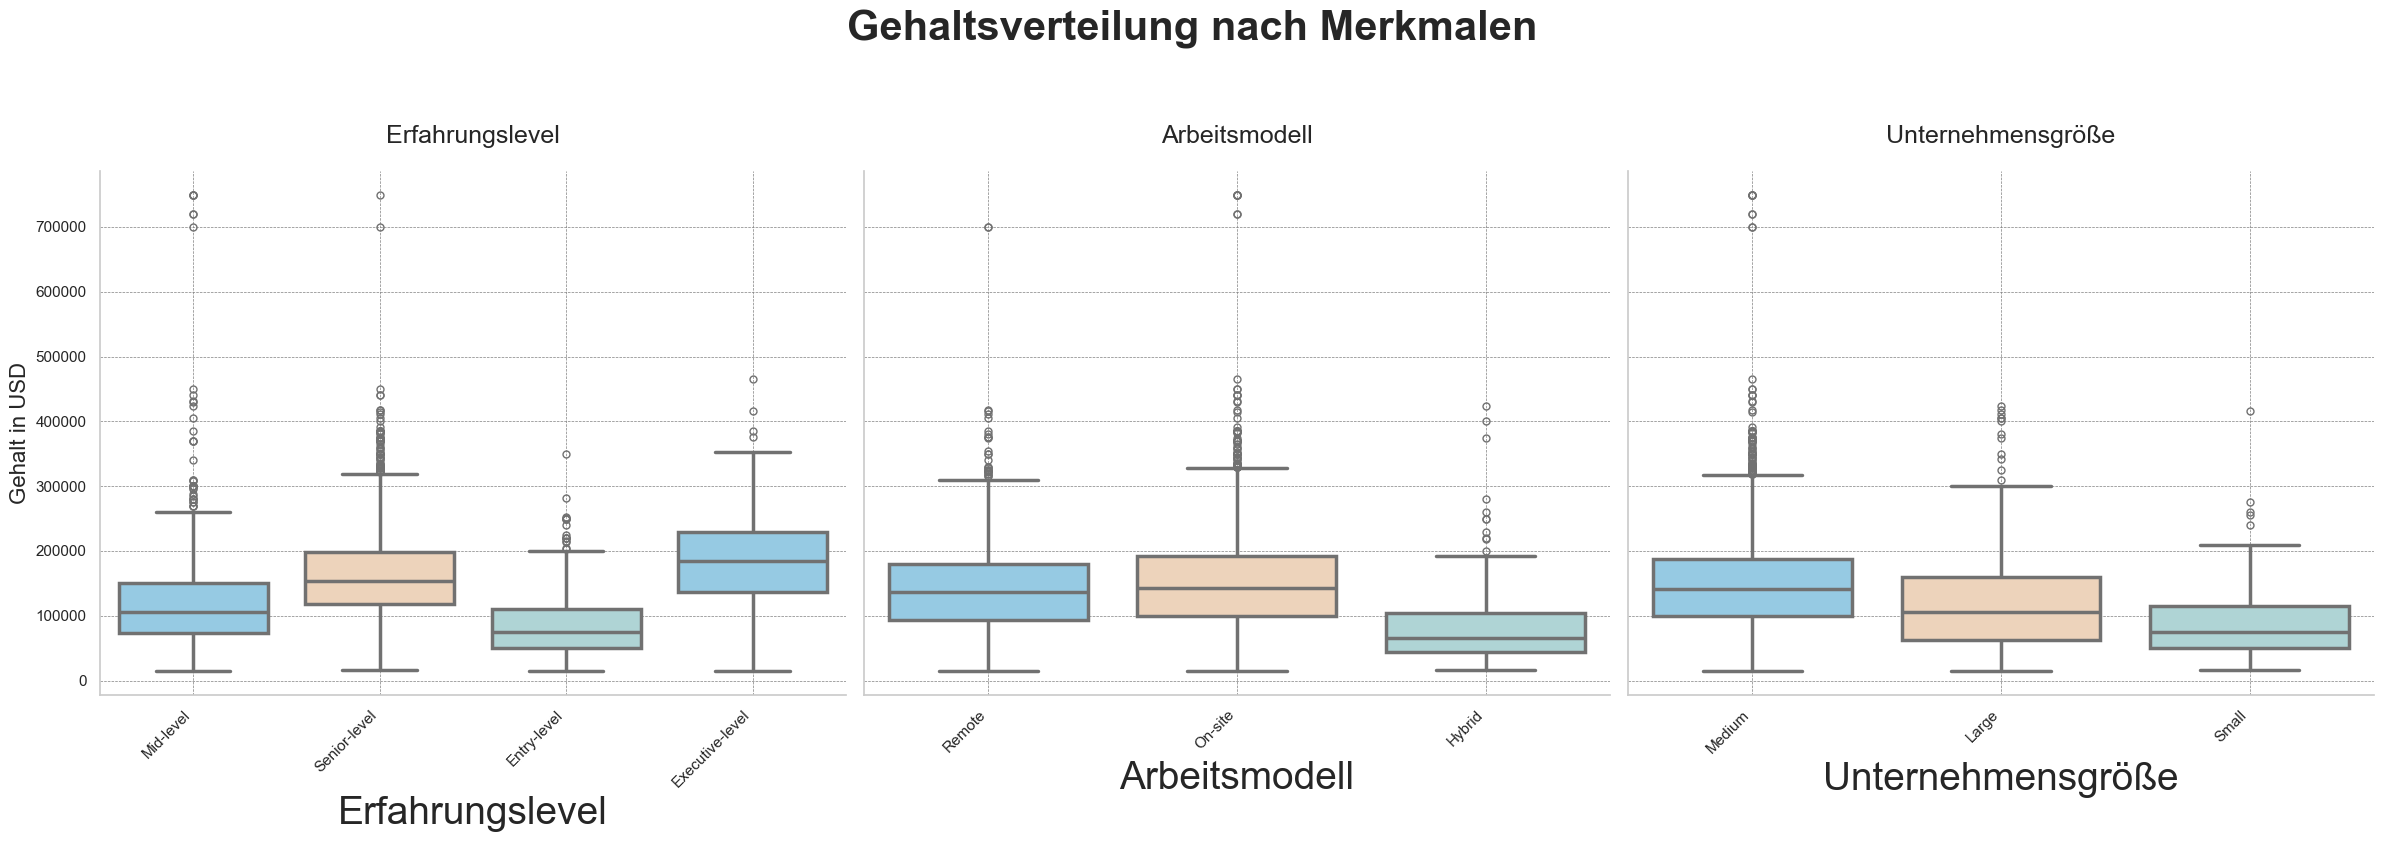

In [14]:
sns.set_theme(style="whitegrid", palette="Set2")
custom_palette = ["#89CFF0", "#F5D3B3", "#A8DADC"]
plt.rcParams.update({'font.size': 12, 'font.family': 'sans-serif'})
fig, axes = plt.subplots(1, 3, figsize=(24, 8), sharey=True)
fig.suptitle('Gehaltsverteilung nach Merkmalen', fontsize=30, fontweight='bold', y=1.05)

categories = ['experience_level', 'work_models', 'company_size']
category_titles = ['Erfahrungslevel', 'Arbeitsmodell', 'Unternehmensgröße']

for i, category in enumerate(categories):
    sns.boxplot(ax=axes[i], x=category, y='salary_in_usd', data=df,
                linewidth=2.5, fliersize=5, notch=False, palette=custom_palette)
    
    axes[i].set_title(category_titles[i], fontsize=18, pad=20)
    axes[i].set_xlabel(category_titles[i], fontsize=28)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")
    axes[i].set_ylabel('Gehalt in USD' if i == 0 else '', fontsize=16)
    
    axes[i].grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [15]:
highest_salary = df['salary_in_usd'].max()
print(highest_salary)

750000


In [16]:
# Berechnung der Korrelationen zwischen numerischen Features und der Zielvariable
numerical_correlations = df.select_dtypes(include=[np.number]).corr()['salary_in_usd'].sort_values()

numerical_correlations

salary           0.043347
work_year        0.155993
salary_in_usd    1.000000
Name: salary_in_usd, dtype: float64

In [17]:

#OneHotEncoder
ohe = OneHotEncoder()

df_encode = ohe.fit_transform(df.select_dtypes(include=['object'])).toarray()

df_encode = pd.DataFrame(df_encode, columns=ohe.get_feature_names_out(df.select_dtypes(include=['object']).columns))

df = pd.concat([df[['work_year', 'salary_in_usd']].reset_index(drop=True), df_encode], axis=1)


In [18]:
# Berechnung der Korrelationen zwischen numerischen Features und der Zielvariable
numerical_correlations = df.select_dtypes(include=[np.number]).corr()['salary_in_usd'].sort_values()

numerical_correlations

experience_level_Entry-level       -0.263600
salary_currency_EUR                -0.237702
experience_level_Mid-level         -0.218203
job_title_Data Analyst             -0.217778
salary_currency_GBP                -0.185756
                                      ...   
experience_level_Senior-level       0.298585
company_location_United States      0.336531
employee_residence_United States    0.348787
salary_currency_USD                 0.359070
salary_in_usd                       1.000000
Name: salary_in_usd, Length: 332, dtype: float64

In [19]:

target = df['salary_in_usd']
features = df.drop(columns=['salary_in_usd'])

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(features, target)

feature_scores = pd.DataFrame({
    'Feature': features.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

feature_scores.head(10)



,Feature,Score
251,salary_currency_USD,976.458241
228,employee_residence_United States,913.693126
326,company_location_United States,842.554576
136,experience_level_Senior-level,645.711206
133,experience_level_Entry-level,492.622060
237,salary_currency_EUR,395.066637
135,experience_level_Mid-level,329.803783
37,job_title_Data Analyst,328.456285
238,salary_currency_GBP,235.767771
141,work_models_Hybrid,184.419774


In [20]:
# Aufteilung der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [21]:
# Initialisierung des Random Forest Regressors
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:

predictions = model.predict(X_test)

# Bewertung des Modells
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error (MSE): 4079052085.233043
R^2 Score: 0.30592962927909584
Mean Absolute Error: 44892.62978195536


In [23]:

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f"Linear Regression MSE: {mse_lr}, R^2: {r2_lr}, MAE: {mae_lr}")


Linear Regression MSE: 3.491476722647523e+31, R^2: -5.940915910400601e+21, MAE: 498376543379256.06


In [24]:

xgb = XGBRegressor(objective ='reg:squarederror', n_estimators=100, learning_rate=0.05, random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print(f"XGBoost MSE: {mse_xgb}, R^2: {r2_xgb}, MAE: {mae_xgb}")


XGBoost MSE: 3975755486.1515627, R^2: 0.323506043436258, MAE: 43671.89681581439


In [25]:

lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)

mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)

print(f"LightGBM MSE: {mse_lgbm}, R^2: {r2_lgbm}, MAE: {mae_lgbm}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 134
[LightGBM] [Info] Number of data points in the train set: 5279, number of used features: 65
[LightGBM] [Info] Start training from score 145553.183557
LightGBM MSE: 4042935304.3532634, R^2: 0.3120750736055422, MAE: 43781.436961774554


In [29]:
# Dummy Regressor 
dummy_regr = DummyRegressor(strategy="mean")

dummy_regr.fit(X_train, y_train)

y_pred = dummy_regr.predict(X_test)

mae_dummy = mean_absolute_error(y_test, y_pred)
print(f"Der mittlere quadratische Fehler (MSE) des Dummy Regressors ist: {mae_dummy}")

Der mittlere quadratische Fehler (MSE) des Dummy Regressors ist: 56498.75737599523


In [ ]:

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3]
}

grid_search = GridSearchCV(estimator=XGBRegressor(objective ='reg:squarederror', random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3,
                           verbose=1)

grid_search.fit(X_train, y_train)
print("Beste Hyperparameter:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

print(f"Verbessertes XGBoost Modell MSE: {mse_best}, R^2: {r2_best}, MAE: {mae_best}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Beste Hyperparameter: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200}
Verbessertes XGBoost Modell MSE: 3953934247.164335, R^2: 0.3272190324143307, MAE: 43336.53056788589


In [ ]:
extended_param_grid = {
    'n_estimators': [200, 300],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

extended_grid_search = GridSearchCV(estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
                                    param_grid=extended_param_grid,
                                    scoring='neg_mean_squared_error',
                                    cv=3,
                                    verbose=1)

extended_grid_search.fit(X_train, y_train)
print("Beste erweiterte Hyperparameter:", extended_grid_search.best_params_)
best_extended_model = extended_grid_search.best_estimator_

y_pred_extended_best = best_extended_model.predict(X_test)
mse_extended_best = mean_squared_error(y_test, y_pred_extended_best)
r2_extended_best = r2_score(y_test, y_pred_extended_best)
mae_extended_best = mean_absolute_error(y_test, y_pred_extended_best)

print(f"Erweitertes XGBoost Modell MSE: {mse_extended_best}, R^2: {r2_extended_best}, MAE: {mae_extended_best}")



Fitting 3 folds for each of 486 candidates, totalling 1458 fits
Beste erweiterte Hyperparameter: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.7}
Erweitertes XGBoost Modell MSE: 3924475499.101123, R^2: 0.3322315803695841, MAE: 43234.71608664773


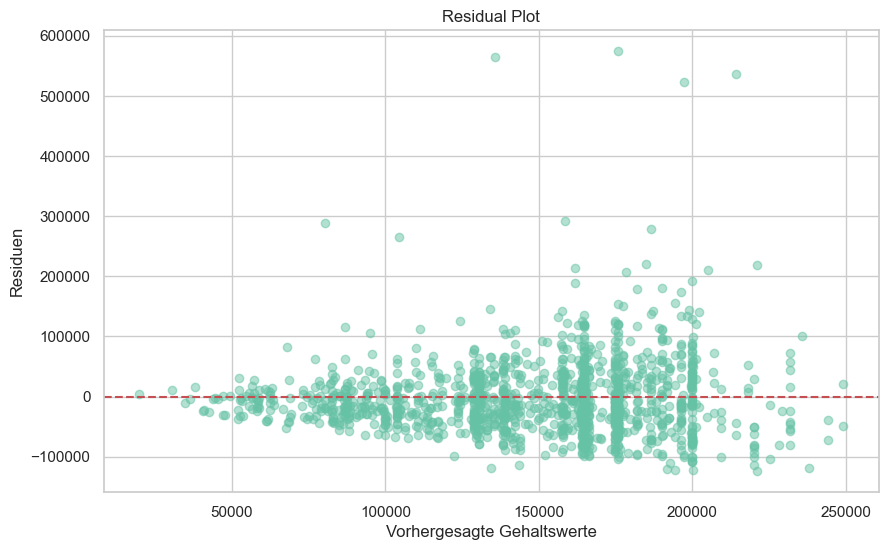

In [ ]:
predictions = best_extended_model.predict(X_test)

residuals = y_test - predictions

# Residual Plot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Vorhergesagte Gehaltswerte')
plt.ylabel('Residuen')
plt.show()

In [ ]:

specific_features = {
    'job_title_Machine Learning Engineer': 1, 
    'experience_level_Senior-level': 1,
    'employment_type_Full-time': 1,
    'work_models_On-site': 1,
    'work_year': 2024,
    'employee_residence_United States': 1,
    'salary_currency_USD': 1,
    'company_size_Medium': 1,
    'company_location_United States': 1
}


all_feature_names = df.columns.tolist()
all_feature_names.remove('salary_in_usd')

# Merkmale auf 0
all_features = {feature: 0 for feature in all_feature_names}

# Werte für die spezifischen Merkmale auf 1
all_features.update(specific_features)

input_df = pd.DataFrame([all_features])

predictions = best_extended_model.predict(input_df)

print("Vorhergesagtes Gehalt:", predictions[0])


Vorhergesagtes Gehalt: 199767.73


In [3]:

# Datensatz laden
prüfdf = pd.read_csv("data_science_salaries.csv")
# Filterkriterien definieren
filter_kriterien = (
    (prüfdf['job_title'] == 'Machine Learning Engineer') &
    (prüfdf['experience_level'] == 'Senior-level') &
    (prüfdf['employment_type'] == 'Full-time') &
    (prüfdf['work_models'] == 'On-site') &
    (prüfdf['work_year'] == 2023) &
    (prüfdf['employee_residence'] == 'United States') &
    (prüfdf['salary_currency'] == 'USD') &
    (prüfdf['company_size'] == 'Medium') &
    (prüfdf['company_location'] == 'United States')
)

# Gefilterte Zeile(n) ausgeben
gefilterte_zeilen = prüfdf[filter_kriterien]

print(gefilterte_zeilen)


                      job_title experience_level employment_type work_models  \
591   Machine Learning Engineer     Senior-level       Full-time     On-site   
592   Machine Learning Engineer     Senior-level       Full-time     On-site   
599   Machine Learning Engineer     Senior-level       Full-time     On-site   
600   Machine Learning Engineer     Senior-level       Full-time     On-site   
611   Machine Learning Engineer     Senior-level       Full-time     On-site   
...                         ...              ...             ...         ...   
4283  Machine Learning Engineer     Senior-level       Full-time     On-site   
4284  Machine Learning Engineer     Senior-level       Full-time     On-site   
4301  Machine Learning Engineer     Senior-level       Full-time     On-site   
4302  Machine Learning Engineer     Senior-level       Full-time     On-site   
4403  Machine Learning Engineer     Senior-level       Full-time     On-site   

      work_year employee_residence  sal

In [ ]:
durchschnitt_salary = gefilterte_zeilen['salary_in_usd'].mean()
durchschnitt_salary

198257.4928229665